# Task_2

### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

df1 = pd.read_csv('E:/prodigy inturn/task1/test.csv')


df2 = pd.read_csv('E:/prodigy inturn/task1/gender_submission.csv')

df = pd.merge(df1, df2, on='PassengerId')
                 
print(df.head())

print("-*-*-*--*-*-*-*-*--*-*-*-*---------**-*-*-*-------**---*-*-*--*-*-*-*-*--*-*-*-*---------**-*-*-*-------**-")

print(df.info())

print("-*-*-*--*-*-*-*-*--*-*-*-*---------**-*-*-*-------**--*-*-*--*-*-*-*-*--*-*-*-*---------**-*-*-*-------**--")

print(df.describe())
                 

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  
-*-*-*--*-*-*-*-*--*-*-*-*---------**-*-*-*-------**---*-*-*--*-*-*-*-*--*-*-*-*---------**-*-*-*-------**-
<class 'p

### cleaning data

In [28]:
# Check missing data
print(df.isnull().sum())

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop rows where 'Embarked' is missing 
df.dropna(subset=['Embarked'], inplace=True)

# create a new feature that indicates whether a passenger had a cabin or not
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

# Drop the 'Cabin' column since it's mostly missing
df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


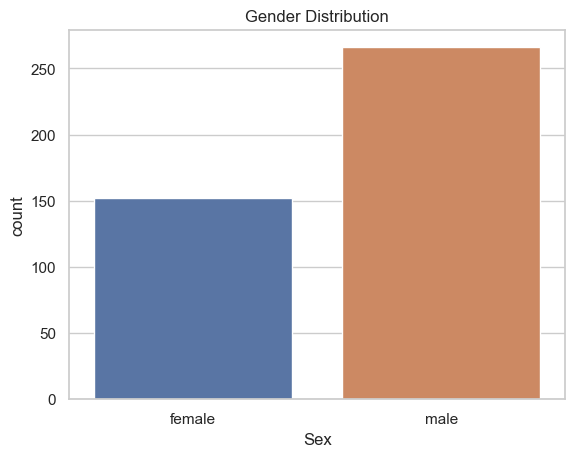

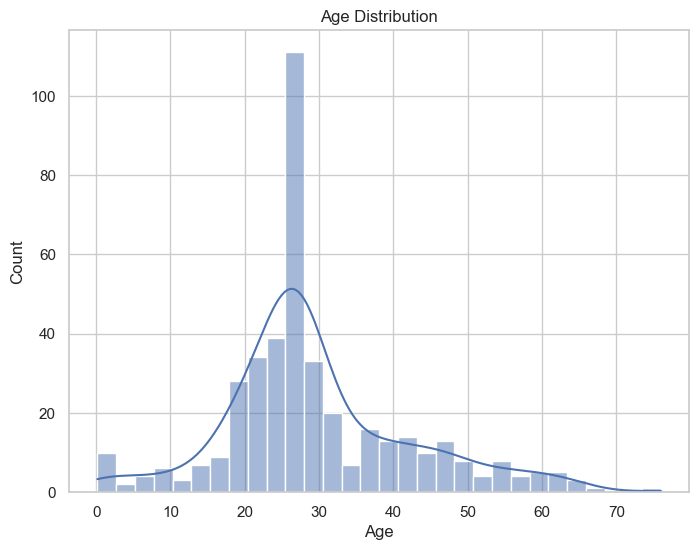

In [29]:
# Convert 'Sex' and 'Embarked' to categorical types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Create FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone column (1 if alone, 0 otherwise)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Bar plot for gender distribution
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()


# Histogram for age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()



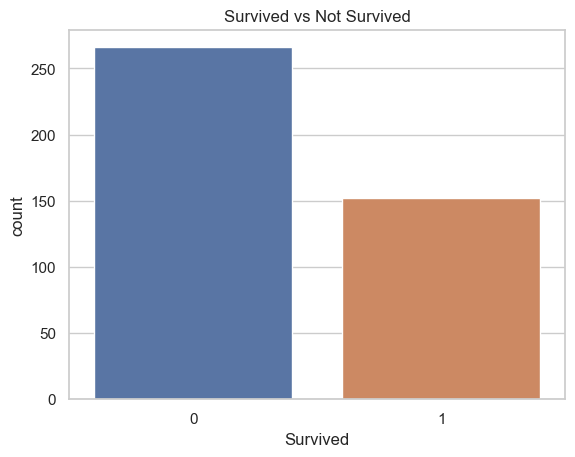

In [30]:
# Bar plot for survival distribution
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Not Survived')
plt.show()


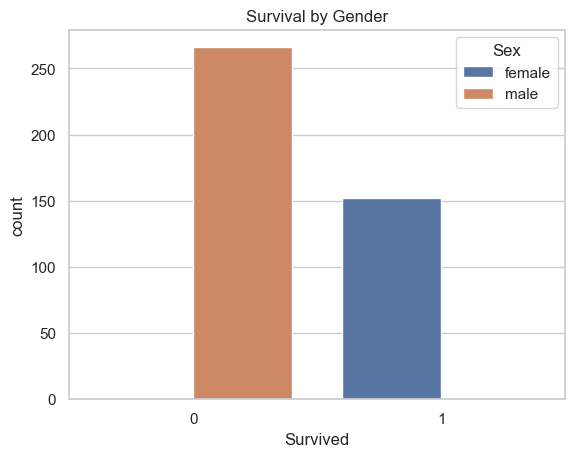

In [31]:
# Bar plot for survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()


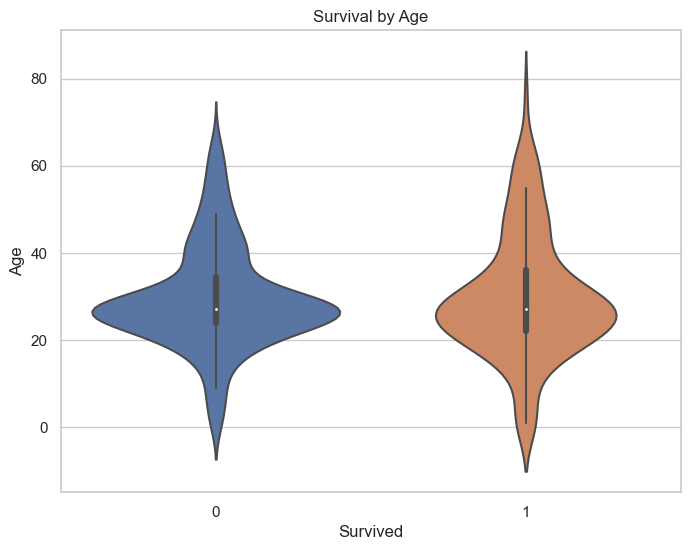

In [32]:
# Violin plot for survival by age
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Age', data=df, split=True)
plt.title('Survival by Age')
plt.show()



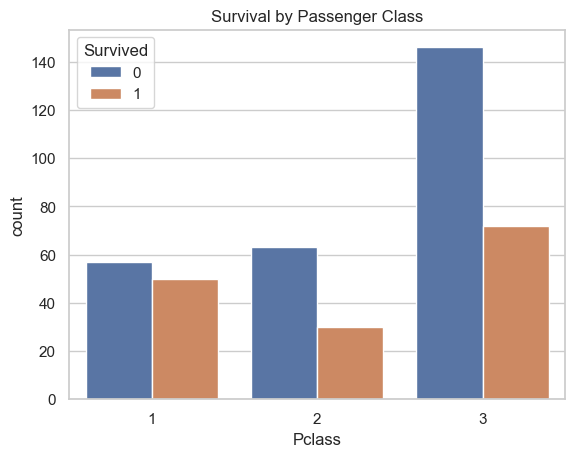

In [34]:


# Bar plot for survival by Pclass
sns.countplot(x='Pclass', hue='Survived ', data=df)
plt.title('Survival by Passenger Class')
plt.show()

In [44]:
'''# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()'''


ValueError: could not convert string to float: 'Kelly, Mr. James'

<Figure size 1000x800 with 0 Axes>

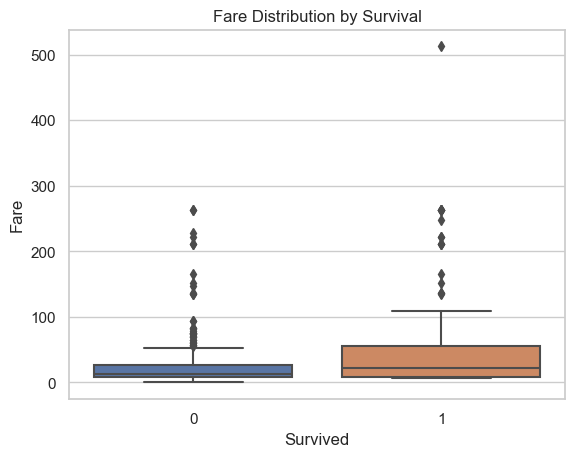

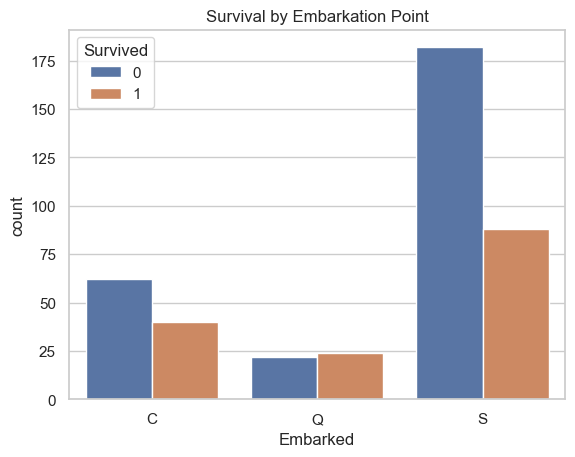

In [36]:
# Boxplot for Fare by Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

# Count plot for Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Point')
plt.show()


# Conclusion:
Through this data cleaning and exploratory data analysis (EDA) on the Titanic dataset, we gained several key insights:

Age and Missing Data: The dataset contains missing data, particularly in the Age and Cabin columns. Filling missing values or dropping columns, like Cabin, helps ensure better analysis. Age was filled with the median age to handle missing data.

Gender and Survival: Gender played a crucial role in survival rates. Female passengers had a significantly higher survival rate compared to male passengers, likely due to the "women and children first" policy during evacuation.

Class and Survival: Passenger class also had a strong impact on survival rates. First-class passengers had the highest survival rate, while third-class passengers had the lowest.

Age Distribution: The age distribution shows that most passengers were young adults, but age did not strongly correlate with survival, though younger children had a higher survival rate.

Embarked Port: Most passengers boarded the Titanic at port S (Southampton), and there was no strong correlation between embarked port and survival rate.

Overall, this EDA provided insights into the demographic and survival patterns of the Titanic passengers, revealing that gender and class were significant factors in determining survival. This analysis also emphasizes the importance of data cleaning to ensure accurate insights